In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

In [4]:
df=pd.read_csv('/content/Company_Data.csv')

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
m

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df['Sales_Value'] = np.where(df['Sales'] > 8, 1, 0)


In [8]:
df.drop(columns='Sales',inplace=True)

In [9]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Value
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [10]:
df['ShelveLoc']=df['ShelveLoc'].replace({'Good':2,'Medium':1,'Bad':0})

/tmp/ipython-input-1952171630.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ShelveLoc']=df['ShelveLoc'].replace({'Good':2,'Medium':1,'Bad':0})


In [11]:
df['Urban']=df['Urban'].replace({'Yes':1,'No':0})

/tmp/ipython-input-237545333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Urban']=df['Urban'].replace({'Yes':1,'No':0})


In [12]:
df['US']=df['US'].replace({'Yes':1,'No':0})

/tmp/ipython-input-748856561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['US']=df['US'].replace({'Yes':1,'No':0})


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
# Custom Train-Test Split
def train_test_split_np(X, y, test_size=0.2, random_state=None):
    """
    Train-Test Split
    """
    X_is_df = isinstance(X, pd.DataFrame)
    y_is_ser = isinstance(y, pd.Series)

    n_samples = X.shape[0]
    rng = np.random.default_rng(random_state)
    indices = np.arange(n_samples)
    rng.shuffle(indices)

    test_size_int = int(n_samples * test_size)
    test_idx = indices[:test_size_int]
    train_idx = indices[test_size_int:]

    if X_is_df:
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    else:
        X_train, X_test = X[train_idx], X[test_idx]

    if y_is_ser:
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    else:
        y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

In [15]:
# Train / Validation / Test Split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split_np(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split_np(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value


In [17]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth
        # empty dictionary to store feature importance
        self.feature_importance = {}


    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []

        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain
        information_gain = parent_entropy - weighted_entropy
        return information_gain


    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain,
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split


    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

    def build_tree(self, dataset, current_depth=0):#This is a recursive function that actually builds the full tree.
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and (self.max_depth is None or current_depth <= self.max_depth):
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
              # record importance for the feature
                feature_index = best_split["feature"]
                gain_value = best_split["gain"]
                if feature_index in self.feature_importance:
                  self.feature_importance[feature_index] += gain_value
                else:
                  self.feature_importance[feature_index] = gain_value
            # continue splitting recursively
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)

    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        # Reshape y to be 2-dimensional before concatenation
        y_reshaped = y.reshape(-1, 1)
        dataset = np.concatenate((X, y_reshaped), axis=1)
        self.root = self.build_tree(dataset)
        # normalize feature importance so they sum to 1
        total_gain = sum(self.feature_importance.values())
        if total_gain != 0:
            for f in self.feature_importance:
                self.feature_importance[f] = self.feature_importance[f] / total_gain


    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions

    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

In [18]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [19]:
# Convert to numpy
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np  = X_test.to_numpy()
y_test_np  = y_test.to_numpy()
X_val_np   = X_val.to_numpy()
y_val_np   = y_val.to_numpy()
# Create and train model
model = DecisionTree(max_depth=8, min_samples=10)
model.fit(X_train_np, y_train_np)

In [20]:
y_pred = model.predict(X_test_np)


In [21]:
print(f'  Unpruned Tree accuracy is {accuracy(y_test_np,y_pred)}')

  Unpruned Tree accuracy is 0.7666666666666667


In [22]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-10)#1e-10 is added to avoid division from zero

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-10)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-10)


In [23]:
p = precision(y_test_np, np.array(y_pred))
r = recall(y_test_np, np.array(y_pred))
f1 = f1_score(y_test_np, np.array(y_pred))

print(f"Precision: {p:.2f}, Recall: {r:.2f}, F1 Score: {f1:.2f}")


Precision: 0.69, Recall: 0.75, F1 Score: 0.72


In [24]:
print("Feature importances:")
for idx, score in model.feature_importance.items():
    print(f"Feature {idx} , {X.columns[idx]} = {round(score, 3)}")


Feature importances:
Feature 5 , ShelveLoc = 0.037
Feature 4 , Price = 0.189
Feature 2 , Advertising = 0.118
Feature 6 , Age = 0.056
Feature 1 , Income = 0.131
Feature 0 , CompPrice = 0.367
Feature 3 , Population = 0.032
Feature 7 , Education = 0.071


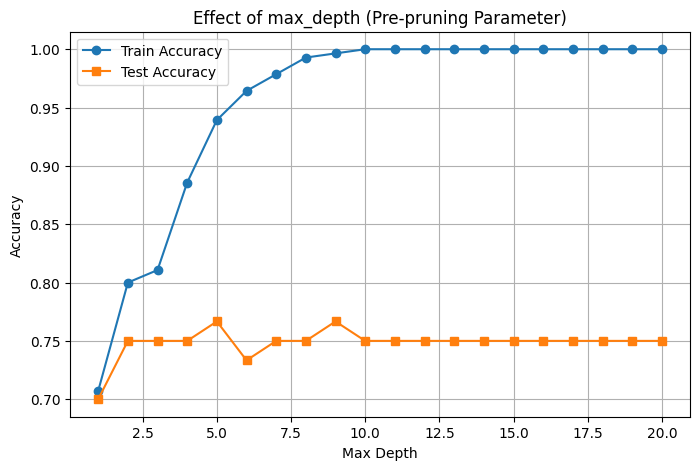

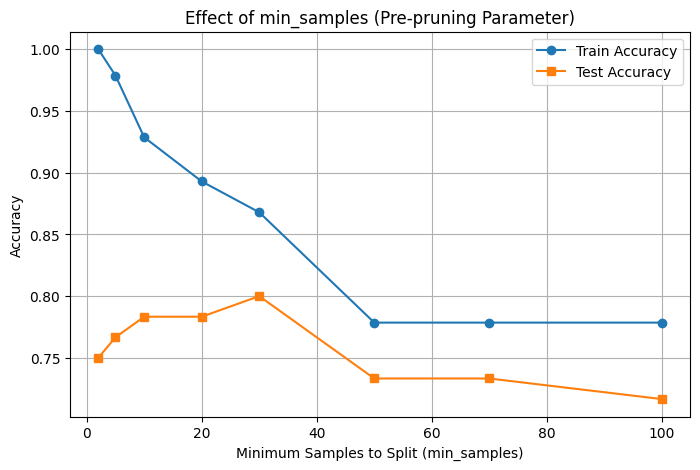

In [25]:
train_acc = []
test_acc = []
depth_values = range(1, 21)

for depth in depth_values:
    model = DecisionTree(max_depth=depth, min_samples=2)
    model.fit(X_train_np, y_train_np)
    y_pred_train = model.predict(X_train_np)
    y_pred_test = model.predict(X_val_np)

    train_acc.append(accuracy(y_train_np, y_pred_train))
    test_acc.append(accuracy(y_val_np, y_pred_test))

plt.figure(figsize=(8,5))
plt.plot(depth_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(depth_values, test_acc, marker='s', label='Test Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth (Pre-pruning Parameter)")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 2️⃣ Effect of min_samples_split ----------
train_acc2 = []
test_acc2 = []
split_values = [2, 5, 10, 20, 30, 50, 70, 100]

for s in split_values:
    model = DecisionTree(max_depth=None, min_samples=s)
    model.fit(X_train_np, y_train_np)
    y_pred_train = model.predict(X_train_np)
    y_pred_test = model.predict(X_val_np)

    train_acc2.append(accuracy(y_train_np, y_pred_train))
    test_acc2.append(accuracy(y_val_np, y_pred_test))

plt.figure(figsize=(8,5))
plt.plot(split_values, train_acc2, marker='o', label='Train Accuracy')
plt.plot(split_values, test_acc2, marker='s', label='Test Accuracy')
plt.xlabel("Minimum Samples to Split (min_samples)")
plt.ylabel("Accuracy")
plt.title("Effect of min_samples (Pre-pruning Parameter)")
plt.legend()
plt.grid(True)
plt.show()